## Imports

In [1]:
import numpy as np
from scipy import stats
import statsmodels.stats.diagnostic as diag
import matplotlib.pyplot as plt
from math import sqrt

%matplotlib inline

## Input data

In [2]:
def input_data(file, red=False):
    good_runs = []
    failed_runs = 0
    with open(file, "r") as f:
        f.readline()
        for line in f:
            res = list(map(float, line.split(",")))
            if res[1] < 0:
                failed_runs += 1
            elif red:
                good_runs.append(res[0] - res[1])
            else:
                good_runs.append(res[0])
    return np.array(good_runs), failed_runs


### Input Control group:

In [3]:
cgr, cfr = input_data("data/base_10.txt", True)
print(f"Failure: {cfr} / {len(cgr)+cfr} = {cfr/(len(cgr)+cfr):.2%}")

Failure: 25 / 200 = 12.50%


## Compute mean and standard deviation

Mean: 34.58
Standard deviation: 2.37


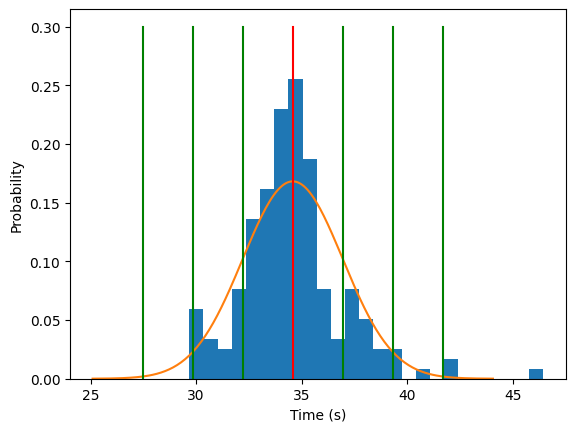

In [4]:

def plot_data(data):
    cmean = np.mean(data)
    cstd = np.std(data)

    print(f"Mean: {cmean:.2f}")
    print(f"Standard deviation: {cstd:.2f}")

    x = np.linspace(cmean - 4 * cstd, cmean + 4 * cstd, 200)

    plt.clf()
    plt.hist(data, bins=25, density=True)
    plt.plot(x, stats.norm.pdf(x, cmean, cstd))
    plt.xlabel("Time (s)")
    plt.ylabel("Probability")
    plt.plot([cmean for i in range(10)], np.linspace(0, 0.3, 10), "r")
    for n in range(1, 4):
        plt.plot([cmean - n * cstd for i in range(10)], np.linspace(0, 0.3, 10), "g")
        plt.plot([cmean + n * cstd for i in range(10)], np.linspace(0, 0.3, 10), "g")
    plt.show()

plot_data(cgr)

## Normality Tests

In [5]:

def normTests(data):
    print("statsmodel library:")
    print("==================================")

    print("Lilliefors")
    ksstat, pvalue = diag.lilliefors(data, dist="norm", pvalmethod="table")
    print("ksstat:", ksstat)
    print("pvalue:", pvalue)

    print("-----------------------------------")

    print("Anderson-Darling")
    ksstat, pvalue = diag.normal_ad(data)
    print("ksstat:", ksstat)
    print("pvalue:", pvalue)

    print("-----------------------------------")

    print("scipy library:")
    print("==================================")

    print("Shapiro-Wilk")
    ksstat, pvalue = stats.shapiro(data)
    print("ksstat:", ksstat)
    print("pvalue:", pvalue)

    print("-----------------------------------")

    print("Anderson-Darling")
    andObj = stats.anderson(data, "norm")
    print("Stat:", andObj.statistic)
    print("Crit:", andObj.critical_values)
    print("Levels:", andObj.significance_level)

    print("-----------------------------------")

    print("Anderson-Darling Logistic")
    andObj = stats.anderson(data, "logistic")
    print("Stat:", andObj.statistic)
    print("Crit:", andObj.critical_values)
    print("Levels:", andObj.significance_level)

    print("-----------------------------------")

    print("Anderson-Darling Gumbel")
    andObj = stats.anderson(data, "gumbel")
    print("Stat:", andObj.statistic)
    print("Crit:", andObj.critical_values)
    print("Levels:", andObj.significance_level)

    print("-----------------------------------")

    print("Anderson-Darling Exponential")
    andObj = stats.anderson(data, "expon")
    print("Stat:", andObj.statistic)
    print("Crit:", andObj.critical_values)
    print("Levels:", andObj.significance_level)

normTests(cgr)

statsmodel library:
Lilliefors
ksstat: 0.10988220094993884
pvalue: 0.0009999999999998899
-----------------------------------
Anderson-Darling
ksstat: 2.2085659203037267
pvalue: 1.264248765104861e-05
-----------------------------------
scipy library:
Shapiro-Wilk
ksstat: 0.9386143684387207
pvalue: 8.085661420409451e-07
-----------------------------------
Anderson-Darling
Stat: 2.208565920304409
Crit: [0.564 0.642 0.77  0.898 1.068]
Levels: [15.  10.   5.   2.5  1. ]
-----------------------------------
Anderson-Darling Logistic
Stat: 0.8045003246932083
Crit: [0.425 0.562 0.659 0.768 0.905 1.009]
Levels: [25.  10.   5.   2.5  1.   0.5]
-----------------------------------
Anderson-Darling Gumbel
Stat: 12.015019506404201
Crit: [0.467 0.628 0.746 0.864 1.023]
Levels: [25.  10.   5.   2.5  1. ]
-----------------------------------
Anderson-Darling Exponential
Stat: 70.64198762552058
Crit: [0.919 1.074 1.336 1.601 1.95 ]
Levels: [15.  10.   5.   2.5  1. ]


### Input another sample:

In [6]:
def input_aman(file):
    good_runs = []
    failed_runs = 0
    with open(file, "r") as f:
        for line in f:
            res = float(line)
            if res == 90 or res == 100:
                failed_runs += 1
            else:
                good_runs.append(res)
    return np.array(good_runs), failed_runs

Failure: 1 / 50 = 2.00%
Success: 49
Mean: 83.61
Standard deviation: 14.21


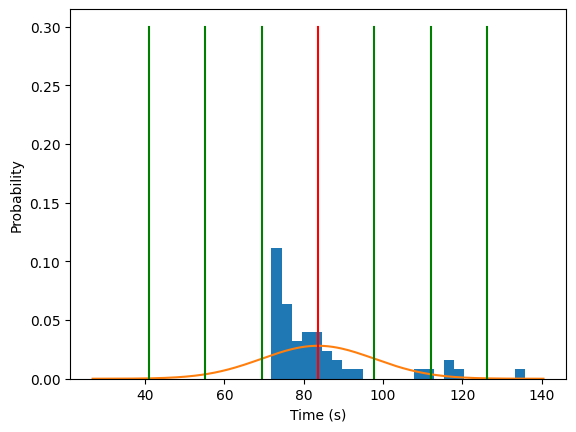

statsmodel library:
Lilliefors
ksstat: 0.22644832613412547
pvalue: 0.0009999999999998899
-----------------------------------
Anderson-Darling
ksstat: 4.8192871302392675
pvalue: 4.0986129057486675e-12
-----------------------------------
scipy library:
Shapiro-Wilk
ksstat: 0.7240680456161499
pvalue: 2.882646477075923e-08
-----------------------------------
Anderson-Darling
Stat: 4.8192871302392675
Crit: [0.538 0.612 0.735 0.857 1.019]
Levels: [15.  10.   5.   2.5  1. ]
-----------------------------------
Anderson-Darling Logistic
Stat: 3.2720753794500226
Crit: [0.424 0.56  0.657 0.765 0.901 1.005]
Levels: [25.  10.   5.   2.5  1.   0.5]
-----------------------------------
Anderson-Darling Gumbel
Stat: 6.628844776832963
Crit: [0.461 0.619 0.736 0.853 1.009]
Levels: [25.  10.   5.   2.5  1. ]
-----------------------------------
Anderson-Darling Exponential
Stat: 17.108688397798232
Crit: [0.911 1.065 1.325 1.587 1.933]
Levels: [15.  10.   5.   2.5  1. ]


In [48]:
gr, fr = input_data("data/base_50.txt", True)
# gr, fr = input_aman("data/Aman_data.txt")
print(f"Failure: {fr} / {len(gr)+fr} = {fr/(len(gr)+fr):.2%}")
print("Success:", len(gr))
plot_data(gr)
normTests(gr)

## Chi-squared test

### Fisher's test for the failure

In [49]:

print([[len(cgr), cfr], [len(gr), fr]])
res = stats.fisher_exact([[len(cgr), cfr], [len(gr), fr]])
print("p = ", res.pvalue)

[[175, 25], [49, 1]]
p =  0.035124905351131774


## Comparison tests

### T-test

In [50]:
res = stats.ttest_ind(gr, cgr, alternative="less", equal_var=False)
print("p = ", res.pvalue)

p =  1.0


### U-test

In [51]:
res = stats.mannwhitneyu(gr, cgr, alternative="greater")
print("p = ", res.pvalue)

p =  5.5814914544997796e-27


### Difference estimator

In [52]:
def dif_estimator(data, control, z=1.645):
    dif = np.mean(control) - np.mean(data)
    var = z * sqrt(np.std(control)**2 / len(control) + np.std(data)**2 / len(data))
    return dif, var

dif, var = dif_estimator(cgr, gr)
print(f"The estimated difference is: {dif:.2f} +- {var:.2f}")

The estimated difference is: 49.03 +- 3.35
